In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

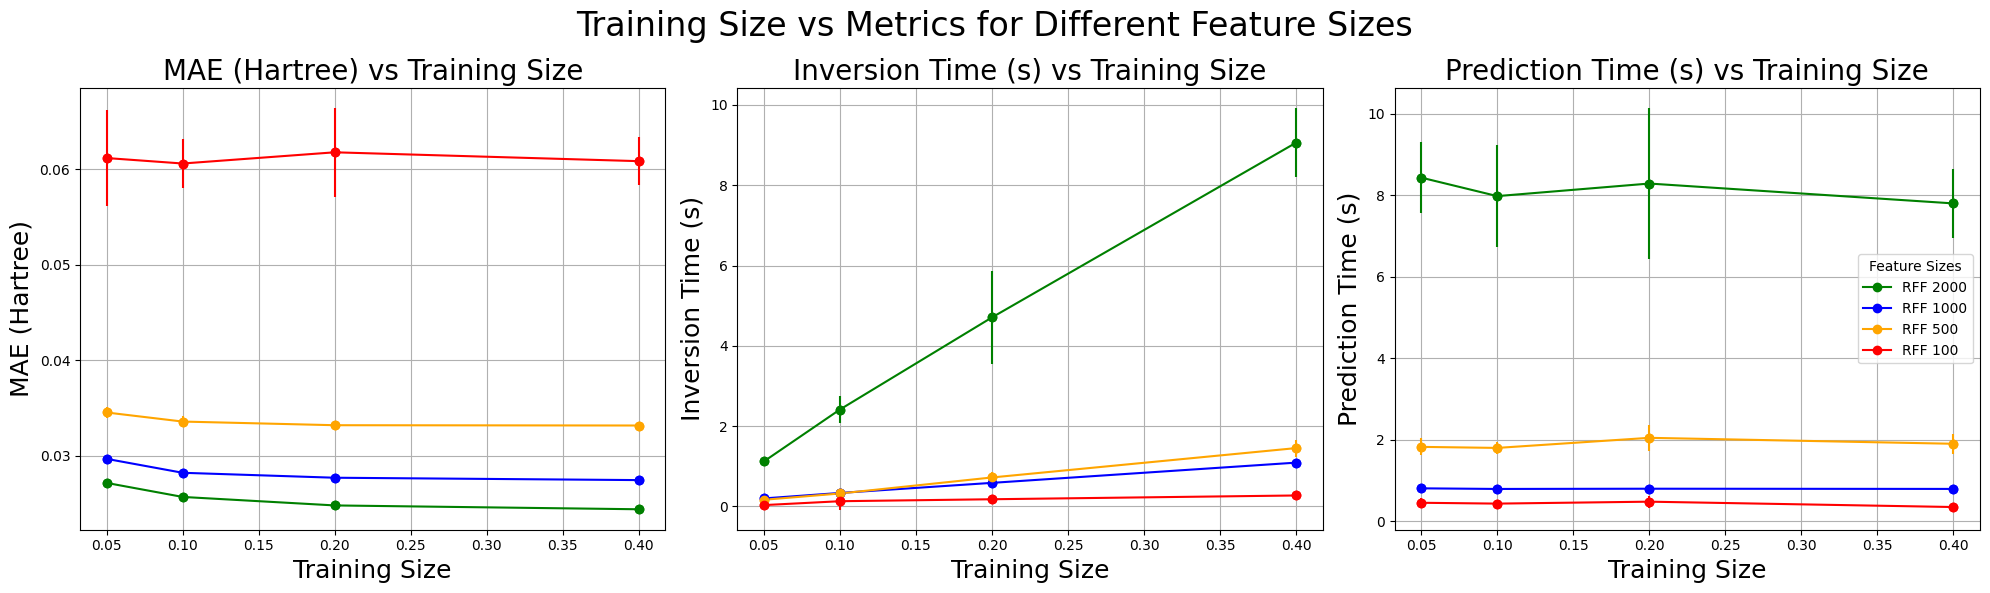

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load datasets and convert them to dictionaries for easier manipulation
data_2000 = {key: value for key, value in np.load('time_diff/RFF_n2000.npz').items()}
data_1000 = {key: value for key, value in np.load('dataset/qm9_1000_rff.npz').items()}
data_500 = {key: value for key, value in np.load('time_diff/RFF_n500.npz').items()}
data_100 = {key: value for key, value in np.load('time_diff/RFF_n100.npz').items()}

# Rename keys in each dataset
for dataset in [data_2000, data_1000, data_500, data_100]:
    if 'inversion_time' in dataset:
        dataset['time_to_invert'] = dataset.pop('inversion_time')
    if 'prediction_time' in dataset:
        dataset['time_to_predict'] = dataset.pop('prediction_time')

# Define x-axis and y-axis labels
x_axis = [0.05, 0.1, 0.2, 0.4]
y_label_dict = {'maes': 'MAE (Hartree)', 'time_to_invert': 'Inversion Time (s)', 
                'time_to_predict': 'Prediction Time (s)'}

# Extract keys for each dataset
data_2000_keys = list(data_2000.keys())
data_1000_keys = list(data_1000.keys())
data_500_keys = list(data_500.keys())
data_100_keys = list(data_100.keys())

# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Iterate over metrics to plot them on different subplots
for i, key in enumerate(['maes', 'time_to_invert', 'time_to_predict']):  # Specify keys explicitly
    # Plot data for each feature size on the same subplot
    for data, keys, label, color in zip(
        [data_2000, data_1000, data_500, data_100],
        [data_2000_keys, data_1000_keys, data_500_keys, data_100_keys],
        ['RFF 2000', 'RFF 1000', 'RFF 500', 'RFF 100'],
        ['g', 'b', 'orange', 'r']
    ):
        if key in keys:  # Ensure the key exists in the dataset
            summed = np.mean(data[key], axis=0)
            stddev = np.std(data[key], axis=0, ddof=0)
            axs[i].plot(x_axis, summed, marker='o', color=color, label=label)
            axs[i].errorbar(x_axis, summed, yerr=stddev, color=color, fmt='o')

    # Customize subplot
    axs[i].set_ylabel(y_label_dict[key], fontsize=18)
    axs[i].set_xlabel('Training Size', fontsize=18)
    axs[i].set_title(f'{y_label_dict[key]} vs Training Size', fontsize=20)
    axs[i].grid(True)

# Add legend to the last subplot
axs[-1].legend(title="Feature Sizes", loc='center right')

# Set a global title
fig.suptitle('Training Size vs Metrics for Different Feature Sizes', fontsize=24)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save the plot
plt.savefig('Training_Size_vs_Metrics_Subplots_Renamed.pdf')
plt.show()